## sklearn.metrics.precision_score
* sklearn.metrics.precision_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1825)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score "Permalink to this definition")

## sklearn.metrics.recall_score
*sklearn.metrics.recall_score(_y_true_,  _y_pred_,  _*_,  _labels=None_,  _pos_label=1_,  _average='binary'_,  _sample_weight=None_,  _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1967)[](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score "Permalink to this definition")

Compute the recall.

The recall is the ratio  `tp  /  (tp  +  fn)`  where  `tp`  is the number of true positives and  `fn`  the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics).

Parameters:

**y_true**1d array-like, or label indicator array / sparse matrix

Ground truth (correct) target values.

**y_pred**1d array-like, or label indicator array / sparse matrix

Estimated targets as returned by a classifier.

**labels**array-like, default=None

The set of labels to include when  `average  !=  'binary'`, and their order if  `average  is  None`. Labels present in the data can be excluded, for example to calculate a multiclass average ignoring a majority negative class, while labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in  `y_true`  and  `y_pred`  are used in sorted order.

Changed in version 0.17: Parameter  `labels`  improved for multiclass problem.

**pos_label**str or int, default=1

The class to report if  `average='binary'`  and the data is binary. If the data are multiclass or multilabel, this will be ignored; setting  `labels=[pos_label]`  and  `average  !=  'binary'`  will report scores for that label only.

**average**{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’

This parameter is required for multiclass/multilabel targets. If  `None`, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

`'binary'`:

Only report results for the class specified by  `pos_label`. This is applicable only if targets (`y_{true,pred}`) are binary.

`'micro'`:

Calculate metrics globally by counting the total true positives, false negatives and false positives.

`'macro'`:

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:

Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall. Weighted recall is equal to accuracy.

`'samples'`:

Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from  [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score "sklearn.metrics.accuracy_score")).

**sample_weight**array-like of shape (n_samples,), default=None

Sample weights.

**zero_division**“warn”, 0 or 1, default=”warn”

Sets the value to return when there is a zero division. If set to “warn”, this acts as 0, but warnings are also raised.

Returns:

**recall**float (if average is not None) or array of float of shape (n_unique_labels,)

Recall of the positive class in binary classification or weighted average of the recall of each class for the multiclass task.

## sklearn.metrics.f1_score
* sklearn.metrics.f1_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L1011)
* F1 = 2 * (precision * recall) / (precision + recall)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [2]:
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [14]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test,pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)

                       
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1Score : {3:.4f}'.format(accuracy,precision,recall,f1score))

In [15]:
import warnings
warnings.filterwarnings('ignore')
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
titanic_df = pd.read_csv('./datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1Score : 0.7805


In [16]:
lr_pred_proba = lr_clf.predict_proba(X_test)

In [17]:
lr_pred_proba

array([[0.46165994, 0.53834006],
       [0.8786297 , 0.1213703 ],
       [0.87717154, 0.12282846],
       [0.88271522, 0.11728478],
       [0.85511283, 0.14488717],
       [0.88227708, 0.11772292],
       [0.88838391, 0.11161609],
       [0.20883565, 0.79116435],
       [0.78271177, 0.21728823],
       [0.36964049, 0.63035951],
       [0.89984786, 0.10015214],
       [0.87486758, 0.12513242],
       [0.87716557, 0.12283443],
       [0.88833807, 0.11166193],
       [0.43605842, 0.56394158],
       [0.85890983, 0.14109017],
       [0.90368101, 0.09631899],
       [0.73334609, 0.26665391],
       [0.72454475, 0.27545525],
       [0.17200141, 0.82799859],
       [0.75354235, 0.24645765],
       [0.61923385, 0.38076615],
       [0.8545423 , 0.1454577 ],
       [0.81483938, 0.18516062],
       [0.88796788, 0.11203212],
       [0.76545781, 0.23454219],
       [0.85968959, 0.14031041],
       [0.92592184, 0.07407816],
       [0.71950544, 0.28049456],
       [0.6952454 , 0.3047546 ],
       [0.

## sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)[source]
* Returns:
precisionndarray of shape (n_thresholds + 1,)
Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

recallndarray of shape (n_thresholds + 1,)
Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

thresholdsndarray of shape (n_thresholds,)
Increasing thresholds on the decision function used to compute precision and recall where n_thresholds = len(np.unique(probas_pred)).

In [19]:
from sklearn.metrics import precision_recall_curve

data = precision_recall_curve(y_test, lr_pred_proba[:, 1])

Text(0, 0.5, 'probability density')

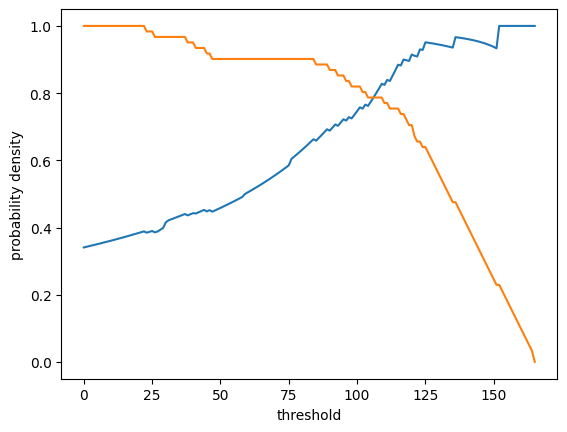

In [23]:
import matplotlib.pyplot as plt

plt.plot(data[0])
plt.plot(data[1])
plt.xlabel("threshold")
plt.ylabel("probability density")